<a href="https://colab.research.google.com/github/Kanekiken0965/CodeClause/blob/main/CodeClause1_Handwritten_Digit_Recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [18]:
(x_train , y_train), (x_test , y_test) = mnist.load_data()

In [19]:
x_train = tf.keras.utils.normalize(x_train, axis=1)

In [29]:
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [30]:
model = tf.keras.models.Sequential()

In [31]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

In [32]:
model.add(tf.keras.layers.Dense(128, activation='relu'))


In [34]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9251 - accuracy: 0.6745
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0283 - accuracy: 0.6025
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9248 - accuracy: 0.6441
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0090 - accuracy: 0.6370
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8805 - accuracy: 0.6518


In [37]:
model.save('handwritten.model')

In [40]:
model = tf.keras.models.load_model('handwritten.model')

In [42]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(len(x_train), len(y_train))

60000 60000


1/1 [==============================] - 0s 21ms/step
This digit is probably a  {3}


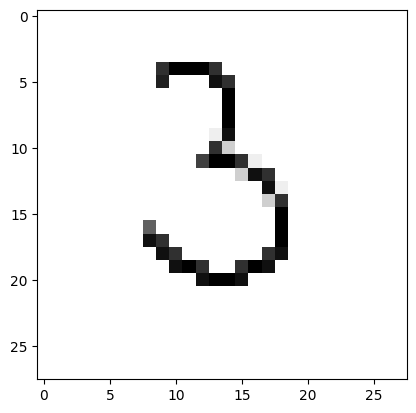

1/1 [==============================] - 0s 21ms/step
This digit is probably a  {6}


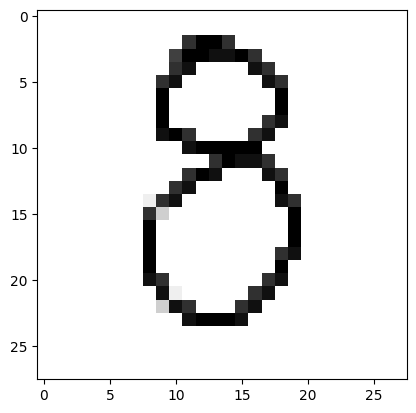

1/1 [==============================] - 0s 20ms/step
This digit is probably a  {2}


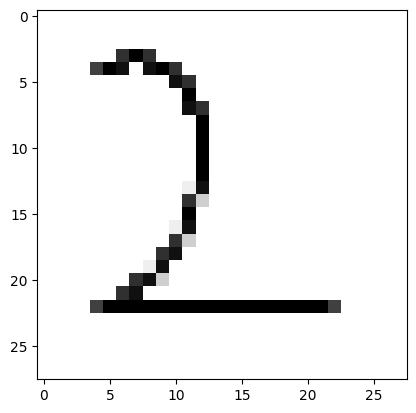

1/1 [==============================] - 0s 19ms/step
This digit is probably a  {6}


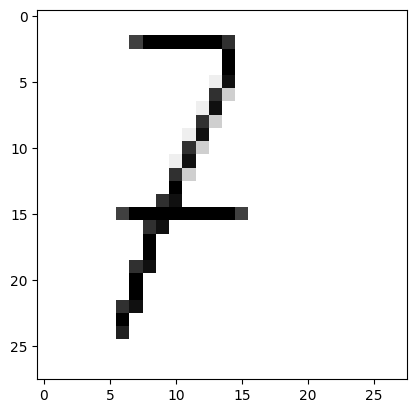

In [50]:
image_number = 1
while os.path.isfile(f"sample_data/{image_number}.png"):
  try:
    img = cv2.imread(f"sample_data/{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print("This digit is probably a " ,{np.argmax(prediction)})
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error")
  finally:
    image_number += 1 